In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

COLLECTION_PATH = '../data/collection.tsv'

In [2]:
collection = pd.read_csv(COLLECTION_PATH, sep='\t', names=['id', 'title', 'description'], header=None)
collection.head()

,id,title,description
0,1,FYY Leather Case with Mirror for Samsung Galax...,Product Description Premium PU Leather Top qua...
1,2,"Playtex Women's 18 Hour Easy On, Easy Off Fron...",Product Description Introducing Playtex 18 hou...
2,4,YUEPIN U-Tube Clamp 304 Stainless Steel Hose P...,Product Description Specification: Material: 3...
3,5,Bruce's Big Storm (Mother Bruce Series),NaN
4,6,DJI Shoulder Neck Strap Belt Sling Lanyard Nec...,Product Description Specifications: Item Condi...


In [3]:
print(collection.shape)
print(collection.info())
print(collection.describe(include='all'))

(1118640, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118640 entries, 0 to 1118639
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   id           1118640 non-null  int64 
 1   title        1080084 non-null  object
 2   description  895727 non-null   object
dtypes: int64(1), object(2)
memory usage: 25.6+ MB
None
                  id                                              title  \
count   1.118640e+06                                            1080084   
unique           NaN                                             960438   
top              NaN  Hanes Men's Sweatshirt, EcoSmart Fleece Hoodie...   
freq             NaN                                                 85   
mean    8.332682e+05                                                NaN   
std     4.797616e+05                                                NaN   
min     1.000000e+00                                                NaN   
25% 

id                  0
title           38556
description    222913
dtype: int64


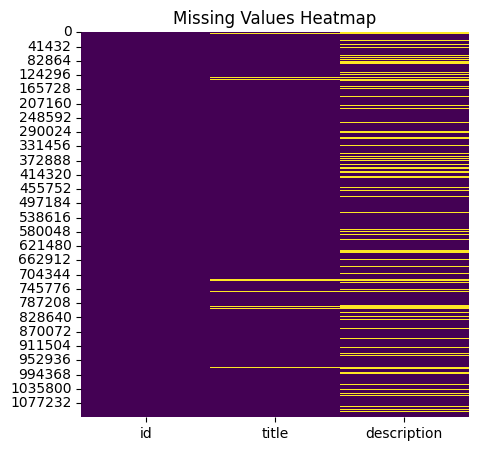

In [4]:
# Check for missing values
missing_values = collection.isnull().sum()
print(missing_values)

plt.figure(figsize=(5, 5))
sns.heatmap(collection.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

/var/folders/1_/83qhk9ps6fd0yym23nn9nfz00000gn/T/ipykernel_47052/1599782915.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['title_length'] = df['title'].apply(len)
/var/folders/1_/83qhk9ps6fd0yym23nn9nfz00000gn/T/ipykernel_47052/1599782915.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['description_length'] = df['description'].apply(len)


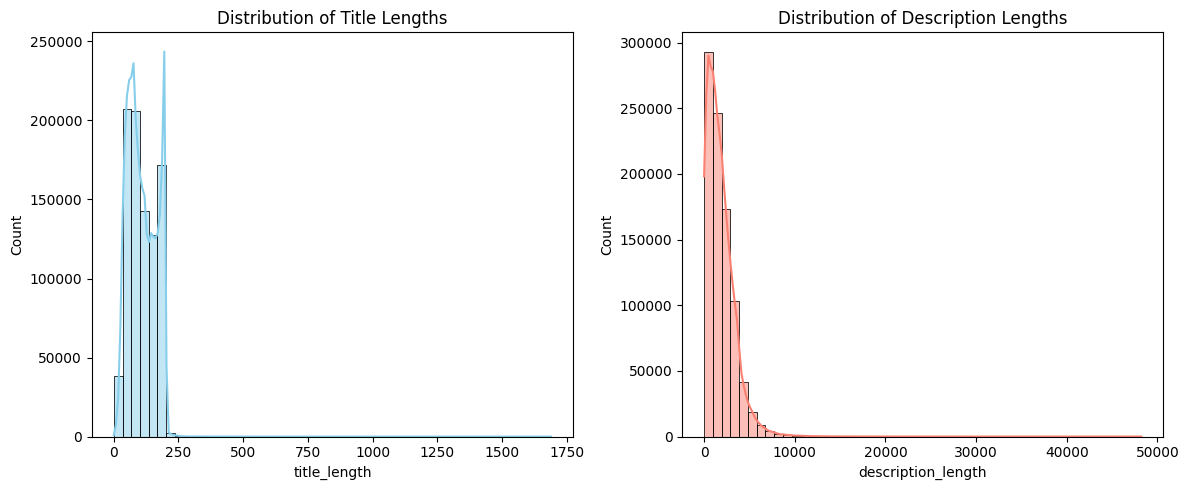

In [11]:
df = collection.dropna()

df['title_length'] = df['title'].apply(len)
df['description_length'] = df['description'].apply(len)

# Histograms
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['title_length'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Title Lengths')

plt.subplot(1, 2, 2)
sns.histplot(df['description_length'], bins=50, kde=True, color='salmon')
plt.title('Distribution of Description Lengths')

plt.tight_layout()
plt.savefig("distribution_of_text_len.png", dpi=300)
plt.show()

In [10]:
title_length_counts = df['title_length'].value_counts().sort_values(ascending=False)

# Get top 5 most common lengths
k = 10
top_lengths = title_length_counts.head(k)

print(f"Top {k} most common title lengths:")
print(top_lengths)


top_ids = df['id'].value_counts().head(10).reset_index()
top_ids.columns = ['id', 'Count']

# Get the top 5 most common titles
top_titles = df['title'].value_counts().head(10).reset_index()
top_titles.columns = ['Title', 'Count']

# Get the top 5 most common descriptions
top_descriptions = df['description'].value_counts().head(10).reset_index()
top_descriptions.columns = ['Description', 'Count']

# Display Top 5 Titles
print("Top 5 Most Common Ids:")
print(top_ids.to_string(index=False))

print("Top 5 Most Common Titles:")
print(top_titles.to_string(index=False))

print("\nTop 5 Most Common Descriptions:")
print(top_descriptions.to_string(index=False))

Top 10 most common title lengths:
title_length
200    10279
199    10172
198     9443
197     8858
196     7962
80      7874
79      7590
78      7581
195     7523
67      7225
Name: count, dtype: int64
Top 5 Most Common Ids:
     id  Count
      1      1
1107720      1
1107703      1
1107704      1
1107705      1
1107706      1
1107708      1
1107709      1
1107713      1
1107714      1
Top 5 Most Common Titles:
                                                                                                                        Title  Count
          Hanes Men's Sweatshirt, EcoSmart Fleece Hoodie, Cotton-Blend Fleece Hooded Sweatshirt, Plush Fleece Pullover Hoodie     83
                                                              Gloria Vanderbilt Women's Amanda Classic High Rise Tapered Jean     82
                                                                              Crocs Unisex-Adult Classic Clogs (Best Sellers)     66
                                                   